In [1]:
from utils import *

hete = Heterogeneity()
hete.check_torch_gpu()

-------------------------------------------------
------------------ VERSION INFO -----------------
Conda Environment: torchy | Python version: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
Torch version: 2.0.1
Torch build with CUDA? True
# Device(s) available: 1, Name(s): Quadro P520



***
# END

In [2]:
X_data = np.load('X_data.npy')
y_data = np.load('y_data.npy')
print(X_data.shape, y_data.shape)

(20, 64, 64, 61, 4) (20, 64, 64, 61, 2)


In [3]:
x = np.moveaxis(np.moveaxis(X_data, -2, 1).reshape(20*61,64,64,4), -1, 1)
y = np.moveaxis(np.moveaxis(y_data, -2, 1).reshape(20*61,64,64,2), -1, 1)
print(x.shape, y.shape)

(1220, 4, 64, 64) (1220, 2, 64, 64)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(817, 4, 64, 64) (817, 2, 64, 64)
(403, 4, 64, 64) (403, 2, 64, 64)


In [5]:
device = 'cuda'

rom = h2_hete_rom().to(device)
optimizer = NAdam(rom.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

loss, val_loss = [], []
metrics = {'loss':[], 'val_loss':[]}
epochs = 10
batch_size = 60

for epoch in range(epochs):
    rom.train()
    epoch_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inp  = torch.Tensor(X_train[i:i+batch_size]).to(device)
        true = torch.Tensor(y_train[i:i+batch_size]).to(device)
        optimizer.zero_grad()
        pred = rom(inp)
        loss = loss_fn(pred,true)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()*inp.size(0)
    metrics['loss'].append(epoch_loss/len(X_train))

In [6]:
y0_pred = rom(torch.Tensor(x[:61]).to(device)).cpu().detach().numpy()
y0_pred.shape

(61, 2, 64, 64)

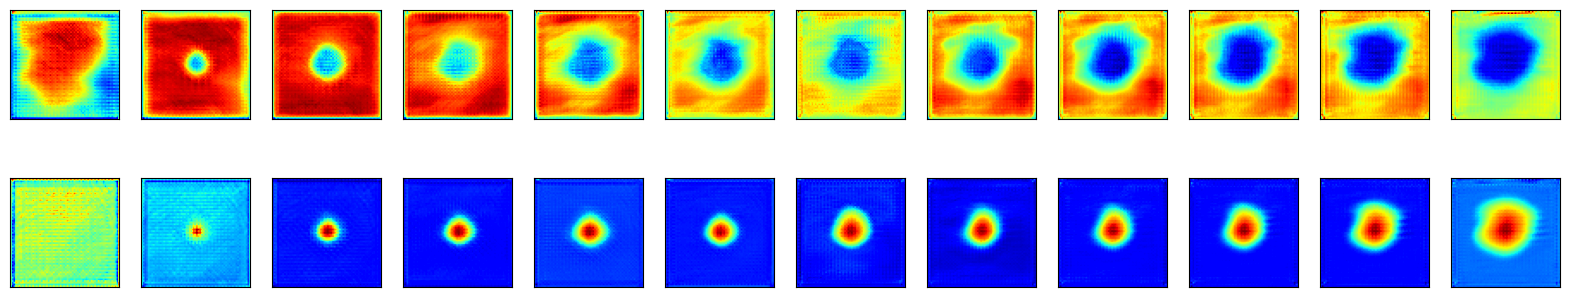

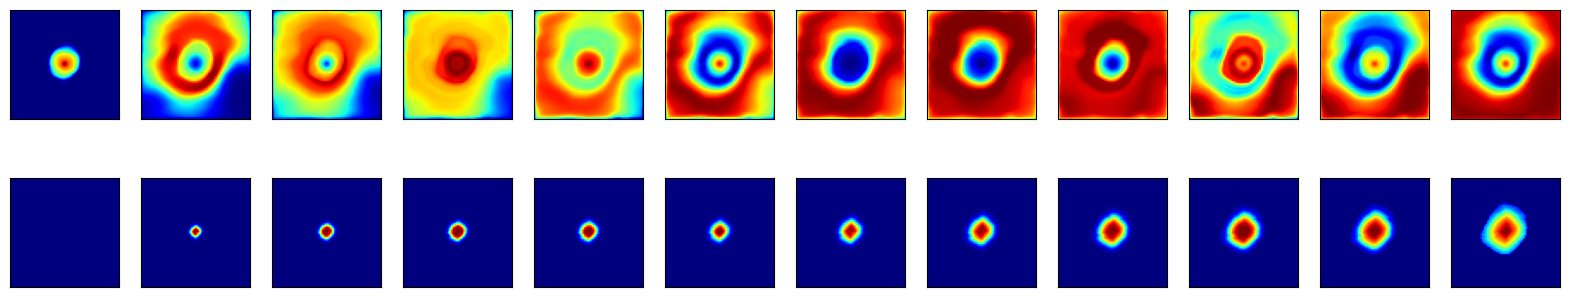

In [11]:
fig, axs = plt.subplots(2, 12, figsize=(20,4))
for i in range(2):
    for j in range(12):
        axs[i,j].imshow(y0_pred[j*5,i], 'jet')
        axs[i,j].set(xticks=[], yticks=[])
plt.show()

fig, axs = plt.subplots(2, 12, figsize=(20,4))
for i in range(2):
    for j in range(12):
        axs[i,j].imshow(y[:61][j*5,i], 'jet')
        axs[i,j].set(xticks=[], yticks=[])
plt.show()